<a href="https://colab.research.google.com/github/ranjanguddu/EVA4-Session-14/blob/master/depth_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Unzip The Folder**

In [0]:
from zipfile import ZipFile
from tqdm import tqdm
import zipfile

# Open your .zip file
image_loc = zipfile.ZipFile("/content/drive/My Drive/image_batch2.zip")
for file in tqdm(iterable=image_loc.namelist(), total=len(image_loc.namelist())):
  image_loc.extract(file, '/content/')

  

100%|██████████| 40001/40001 [00:09<00:00, 4307.21it/s]


**Find the no of Images present the unzipped folder**

In [0]:
! ls '/content/image_batch2' | wc -l

40000


In [0]:
!git clone https://github.com/ranjanguddu/DenseImageModel

Cloning into 'DenseImageModel'...
remote: Enumerating objects: 241, done.
remote: Counting objects: 100% (241/241), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 241 (delta 123), reused 233 (delta 119), pack-reused 0
Receiving objects: 100% (241/241), 11.79 MiB | 37.96 MiB/s, done.
Resolving deltas: 100% (123/123), done.


In [0]:
!wget https://s3-eu-west-1.amazonaws.com/densedepth/nyu.h5 -O ./DenseImageModel/nyu.h5


--2020-05-09 08:36:22--  https://s3-eu-west-1.amazonaws.com/densedepth/nyu.h5
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.52.100
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.52.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172897376 (165M) [application/h5]
Saving to: ‘./DenseImageModel/nyu.h5’

./DenseImageModel/n 100%[===================>] 164.89M  31.3MB/s    in 5.9s    

2020-05-09 08:36:28 (27.8 MB/s) - ‘./DenseImageModel/nyu.h5’ saved [172897376/172897376]



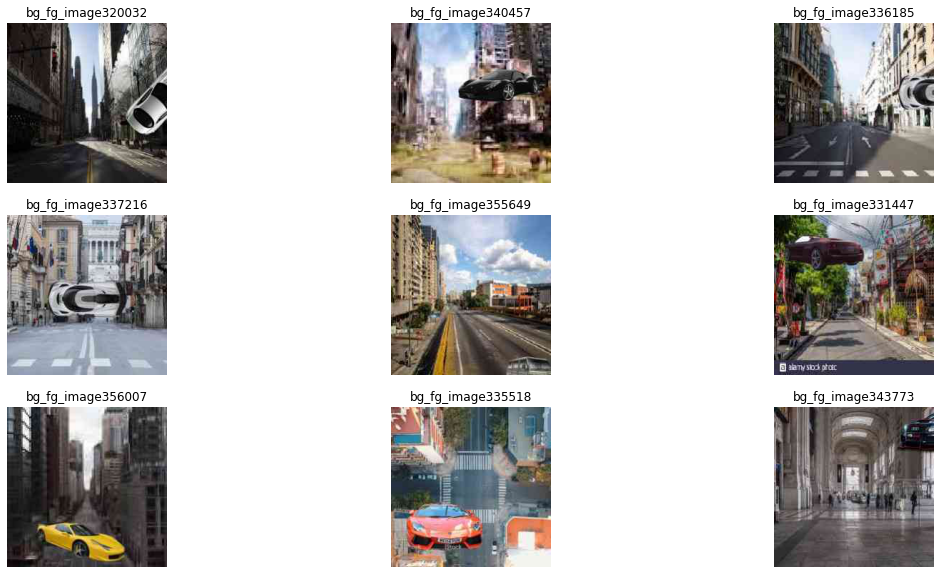

In [0]:
import matplotlib.pyplot as plt
from PIL import Image

figure = plt.figure(figsize=(20,10))

figure.subplots_adjust(hspace=None, wspace=0.1)

count =1
for i in l:
    image = Image.open('/content/image_batch9/'+"bg_fg_image"+str(i)+".jpg")
    
    plt.subplot(3,3,count)
    plt.imshow(image, cmap="gray")
    plt.title("bg_fg_image"+str(i))
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    count+=1
    
    if count ==10:
        break
    
plt.show()



**Before running the code please uplod the file util_function.py (can be find in the same GIT repo)in your DenseImageModel folder. And please create a folder name "Depth_Image" in "/content/" location, so that all processed dense image file can be stored.**

In [0]:
%cd DenseImageModel

import os
import glob
import argparse
import matplotlib
import time
from  util_function import *

# Keras / TensorFlow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '5'
from keras.models import load_model
from layers import BilinearUpSampling2D
#from utils import predict, load_images, display_images
from matplotlib import pyplot as plt


image_folder = '/content/image_batch2/'


# Custom object needed for inference and training
custom_objects = {'BilinearUpSampling2D': BilinearUpSampling2D, 'depth_loss_function': None}

print('Loading model...')

# Load model into GPU / CPU
model = load_model('nyu.h5', custom_objects=custom_objects, compile=False)

print('\nModel loaded ({0}).'.format("nyu.h5"))

# Input images

b = 2 # need to change ... mention the no of batch
INDEX = 40000*(b-1)
size = 1000
n = int(40000/size)

for  i in range(n):
  begin = INDEX+i*size+1
  last = begin + size  
  print(f'start:{begin} end:{last}')
  t1 = time.time()
  inputs = load_images(path =image_folder,start=begin, end = last)
  print(f'{size} no of images gone for processing index {begin} - {last}')
  print('\nLoaded ({0}) images of size {1}.'.format(inputs.shape[0], inputs.shape[1:]))
# Compute results
  outputs = predict(model, inputs)
# store the result in local content folder
  display_images(outputs.copy(), inputs.copy(), start = begin)
  print(f'Turn{i} is completed\n')
  t2 = time.time()
  print(f'Turn{i} is completed in {t2-t1} seconds\n')

  

print("done")

/content/DenseImageModel


Using TensorFlow backend.


Loading model...

Model loaded (nyu.h5).
start:40001 end:41001
1000 no of images gone for processing index 40001 - 41001

Loaded (1000) images of size (448, 448, 3).
(224, 224, 3)



Turn0 is completed

Turn0 is completed in 197.82203578948975 seconds

start:41001 end:42001
1000 no of images gone for processing index 41001 - 42001

Loaded (1000) images of size (448, 448, 3).
(224, 224, 3)



Turn1 is completed

Turn1 is completed in 167.37168979644775 seconds

start:42001 end:43001
1000 no of images gone for processing index 42001 - 43001

Loaded (1000) images of size (448, 448, 3).
(224, 224, 3)



Turn2 is completed

Turn2 is completed in 168.26788759231567 seconds

start:43001 end:44001
1000 no of images gone for processing index 43001 - 44001

Loaded (1000) images of size (448, 448, 3).
(224, 224, 3)



Turn3 is completed

Turn3 is completed in 174.4049689769745 seconds

start:44001 end:45001
1000 no of images gone for processing index 44001 - 45001

Loaded (1000) images of size (448, 448, 3).
(224, 224, 3)



Turn4 is completed

Turn4 is completed in 175.06483459472656 seconds

start:45001 end:46001
1000 no of images gone for processing index 45001 - 46001

Loaded (1000) images of size (448, 448, 3).
(224, 224, 3)



Turn5 is completed

Turn5 is completed in 173.36164808273315 seconds

start:46001 end:47001


In [0]:
!ls /content/Depth_Image/ | wc -l

6000


**All the generated depth images are present in "/conten/Depth_Image/" folder which needs to be written on drive as they will be lost once cloab reset. Below code is write all the file present in Depth_Image folder in the ZIP file.**

In [0]:
from zipfile import ZipFile 
import os 
  
def get_all_file_paths(directory): 
  
    # initializing empty file paths list 
    file_paths = [] 
  
    # crawling through directory and subdirectories 
    for root, directories, files in os.walk(directory): 
        for filename in files: 
            # join the two strings in order to form the full filepath. 
            filepath = os.path.join(root, filename) 
            file_paths.append(filepath) 
  
    # returning all file paths 
    return file_paths         
  
def main(): 
    # path to folder which needs to be zipped 
    directory = '/content/Depth_Image/'
  
    # calling function to get all file paths in the directory 
    file_paths = get_all_file_paths(directory) 
  
    # printing the list of all files to be zipped 
    print('Following files will be zipped:') 
    for file_name in file_paths: 
        print(file_name) 
  
    # writing files to a zipfile 
    with ZipFile('/content/drive/My Drive/DepthImage_Batch-9.zip','a') as zip: 
        # writing each file one by one 
        for file in file_paths: 
            zip.write(file) 
  
    print('All files zipped successfully!')         
  
  

main()
